In [ ]:
import numpy as np
import pandas as pd
import math
from scipy.stats import bernoulli, truncnorm
import matplotlib.pyplot as plt
import random

In [ ]:
RR_array = np.array([-1, 
6.5, 
-1, 
-1, 
-1, 
-1, 
31.65, 
-1, 
6.5, 
-1, 
-1, 
6.5, 
-1, 
-1, 
-1, 
-1, 
-1, 
19.93, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
6.5, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
6.5, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
26.4, 
-1, 
-1, 
-1, 
-1, 
-1, 
63.76, 
-1, 
-1, 
-1, 
-1, 
-1, 
-1, 
26.5, 
-1, 
-1])

partial_one_RR = 6.5

wins_array = RR_array[RR_array >= partial_one_RR]
n_simulations = 1000
n_trades = len(RR_array)

more_than_partial_one_percent = (wins_array > partial_one_RR).sum() / len(wins_array)
rr_above_first_partial_high = round(np.max(wins_array))
rr_below_first_partial_low = round(np.min(wins_array[wins_array > partial_one_RR]))

win_rate = (RR_array >= partial_one_RR).sum() / len(RR_array)

64 20


In [ ]:
def run_simulations():
  RR_achieved = np.array([])
  for i in range(n_simulations):
    # array of random wins and loses based on win rate
    wins_losses = bernoulli.rvs(win_rate, size=n_trades) 

    # total losses
    total_loss_rr = (wins_losses == 0).sum() * -1

    # array of random only partial ones and more than partial ones
    partial_one_close = bernoulli.rvs(more_than_partial_one_percent, size=(wins_losses == 1).sum())

    # total RR from only partial ones
    only_partial_one_RR = (partial_one_close == 0).sum() * partial_one_RR

    # total RR from more than partial ones
    greater_than_partial_one_RR = 0
    for x in range(0, partial_one_close.sum()):
      # pick a random number between highest and lowest RR achieved above the first partial
      greater_than_partial_one_RR = random.randint(rr_below_first_partial_low, rr_above_first_partial_high)

    RR_achieved = np.append(RR_achieved, total_loss_rr + only_partial_one_RR + greater_than_partial_one_RR)
  
  return RR_achieved

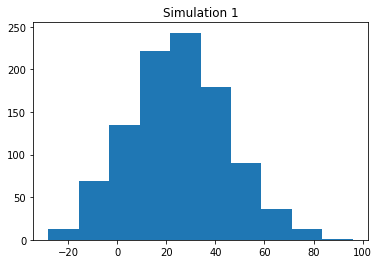

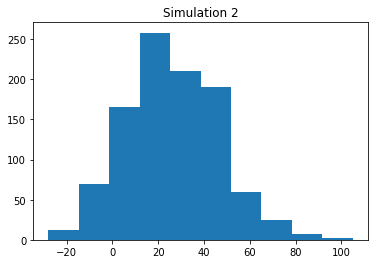

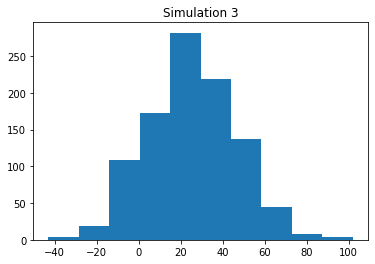

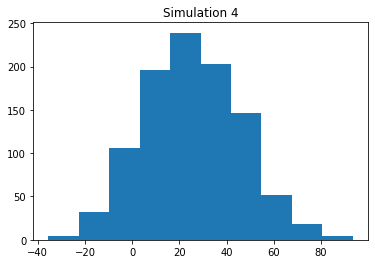

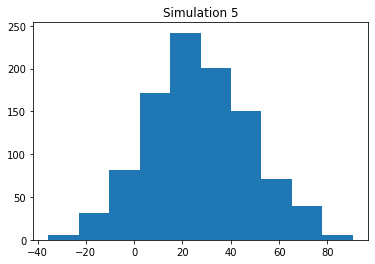

In [ ]:
simulation_RRs = np.zeros((n_simulations,))
epochs = 5
for e in range(0, epochs):
  simulation_RR = run_simulations()
  simulation_RRs = simulation_RRs + simulation_RR
  fig, ax = plt.subplots(1)
  plt.title(f'Simulation {e + 1}')
  ax.hist(simulation_RR)

simulation_RRs = simulation_RRs / epochs

(array([  7.,  21.,  82., 196., 290., 222., 122.,  45.,  10.,   5.]),
 array([-3.3 ,  2.84,  8.98, 15.12, 21.26, 27.4 , 33.54, 39.68, 45.82,
        51.96, 58.1 ]),
 <a list of 10 Patch objects>)

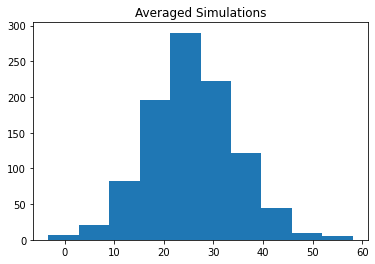

In [ ]:
fig, ax = plt.subplots(1)
plt.title(f'Averaged Simulations')
ax.hist(simulation_RRs)

In [ ]:
print(f"""
For {epochs} epochs of {n_simulations} simulations of {n_trades} Trades: 
Average RR: {np.average(simulation_RRs)}
Minimum RR: {np.min(simulation_RRs)}
Maximum RR: {np.max(simulation_RRs)}
1 STD (68%) Low: {np.average(simulation_RRs) - np.std(simulation_RRs)}
1 STD (68%) High: {np.average(simulation_RRs) + np.std(simulation_RRs)}
2 STD (95%) Low: {np.average(simulation_RRs) - (2 * np.std(simulation_RRs))}
2 STD (95%) High: {np.average(simulation_RRs) + (2 * np.std(simulation_RRs))}
""")


For 5 epochs of 1000 simulations of 58 Trades: 
Average RR: 25.6635
Minimum RR: -3.3
Maximum RR: 58.1
1 STD (68%) Low: 16.777444758780753
1 STD (68%) High: 34.549555241219245
2 STD (95%) Low: 7.89138951756151
2 STD (95%) High: 43.43561048243849

